In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os
import pandas as pd
import seaborn as sns
from datetime import datetime

mpl.rcParams['figure.figsize'] = (18, 6)
mpl.rcParams['axes.grid'] = False

I am choosing the time interval by how many days with no collected days. Choose by the most used periods could insert some type of bias on the data.

# EVO data

In [2]:
def cleaning(data):
    # only travels with more than 30 minutes of duration, that is the limit of cancellation of a reserve
    data = data.loc[(data['duration'] > 30) | (data['distance'] > 3)]

    data.Start_time = pd.to_datetime(data.Start_time)
    data.End_time = pd.to_datetime(data.End_time)

    # Colleting vehicle ids
    car_ids = list(data.Id.unique())

    # Removing uncommon ids
    # Ex: 4c5865a3-4b03-40f6-a3a8-d4e94aae3b17
    ids_uncommon = [id for id in car_ids if id.find('-') != -1]
    car_ids = [id for id in car_ids if id.find('-') == -1]

    data = data.loc[~data.Id.isin(ids_uncommon)]
    
    # Removing microseconds from the dates
    data.Start_time = data.Start_time.apply(lambda x: x.replace(microsecond=0))
    data.End_time = data.End_time.apply(lambda x: x.replace(microsecond=0))
    
    return data

In [3]:
evo_data = pd.read_csv('data/evo_travels.csv')

In [4]:
#cleaning process
evo_data = cleaning(evo_data)

/home/victor/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [5]:
evo_data.head()

,Id,Start_time,Start_lat,Start_lon,Fuel_start,End_time,End_lat,End_lon,Fuel_end,duration,distance
0,JTDKDTB32G1589000,2018-03-01 12:42:24,49.225563,-122.894234,84,2018-03-01 13:21:04,49.314045,-123.083481,84,38.657753,1.688120e+04
2,JTDKDTB32G1589000,2018-03-01 18:36:09,49.314045,-123.083481,84,2018-03-01 20:24:36,49.315067,-123.083481,83,108.456289,1.136032e+02
3,JTDKDTB32G1589000,2018-03-01 20:39:21,49.315067,-123.083481,83,2018-03-01 21:09:48,49.315067,-123.083481,83,30.452687,7.068790e-10
5,JTDKDTB32G1589000,2018-03-01 21:18:46,49.315067,-123.083481,83,2018-03-01 21:33:18,49.327805,-123.081482,83,14.545000,1.422821e+03
6,JTDKDTB32G1589000,2018-03-02 04:36:32,49.327805,-123.081482,83,2018-03-02 05:02:50,49.288547,-123.119751,80,26.307881,5.169018e+03


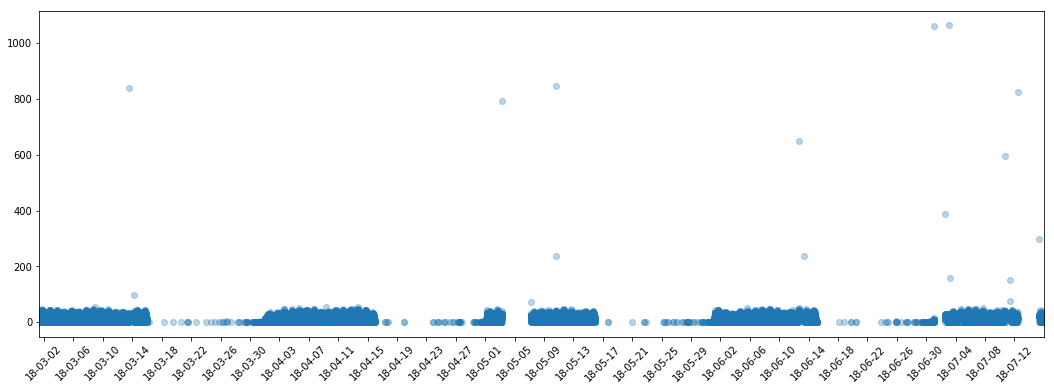

In [45]:
travel_count = evo_data.Start_time.value_counts(sort=False)

fig, ax = plt.subplots(1,1)
ax.scatter(travel_count.index, travel_count.values, alpha=0.3)

ax.set_xlim(travel_count.index.min(), travel_count.index.max())
plt.xticks(rotation=45)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))     #optional formatting 
plt.show()

EVO certainly is the hardest dataset to find a consistent time interval, since it has many whole during the months. So, the best intervals are:
* 2018-03-01 to 2018-03-16 = 15 days
* 2018-03-24 to 2018-04-16 = 22 days
* 2018-05-25 to 2018-06-15 = 21 days

# Modo data

In [7]:
modo_data = pd.read_csv('data/modo_travels.csv')

In [8]:
modo_data.start = modo_data.start.apply(lambda x: datetime.fromtimestamp(x))
modo_data.end = modo_data.end.apply(lambda x: datetime.fromtimestamp(x))

In [9]:
modo_data.head()

,car_id,start,end,duration
0,255,2018-03-02 10:30:36,2018-03-02 12:00:47,90.183333
1,255,2018-03-03 06:45:58,2018-03-03 09:30:49,164.850000
2,255,2018-03-03 11:30:55,2018-03-03 15:00:08,209.216667
3,255,2018-03-03 19:45:59,2018-03-03 22:45:16,179.283333
4,255,2018-03-04 07:30:33,2018-03-04 12:30:59,300.433333


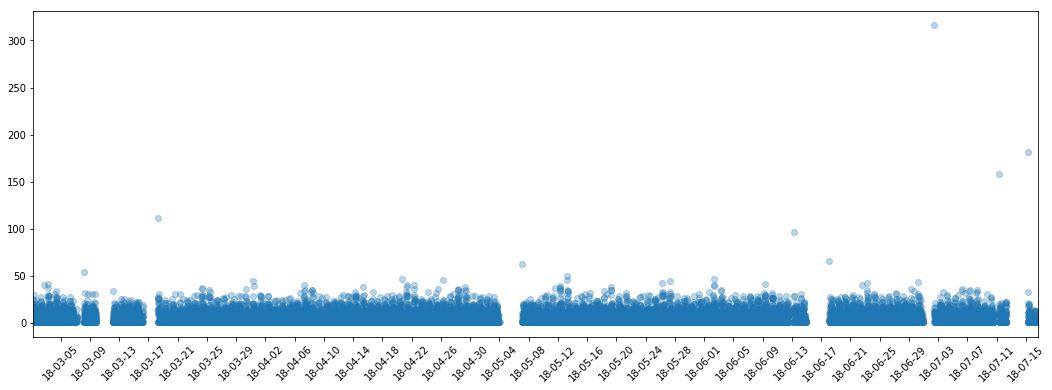

In [46]:
travel_count = modo_data.start.value_counts(sort=False)

fig, ax = plt.subplots(1,1)
ax.scatter(travel_count.index, travel_count.values, alpha=0.3)

ax.set_xlim(travel_count.index.min(), travel_count.index.max())
plt.xticks(rotation=45)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))     #optional formatting 
plt.show()

Modo has a more consistent data intervals, with at least 3 intervals possible intervals.
* 2018-03-18 to 2018-05-04 = 47 days
* 2018-05-07 to 2018-06-15 = 39 days
* 2018-06-17 to 2018-07-12 = 25 days

# Car2Go data

In [11]:
c2g_data = pd.read_csv('data/car2go_travels.csv', index_col=0)

/home/victor/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [12]:
c2g_data.init_time = c2g_data.init_time.apply(lambda x: datetime.fromtimestamp(x))
c2g_data.final_time = c2g_data.final_time.apply(lambda x: datetime.fromtimestamp(x))

In [13]:
c2g_data.head()

,start_lat,start_lon,init_time,end_lat,end_lon,final_time,duration,distance
0,49.26637,-123.11597,2016-12-13 15:39:08,49.27269,-123.13606,2016-12-13 15:45:19,371,1617
1,49.28008,-123.11194,2016-12-13 15:38:23,49.26637,-123.11597,2016-12-13 15:49:24,661,1551
2,49.26948,-123.13282,2016-12-13 15:40:42,49.28101,-123.10971,2016-12-13 15:50:58,616,2109
3,49.26732,-123.10673,2016-12-13 15:49:24,49.26440,-123.13509,2016-12-13 15:55:43,379,2081
4,49.28730,-123.12509,2016-12-13 15:40:42,49.26952,-123.09601,2016-12-13 15:57:16,994,2889


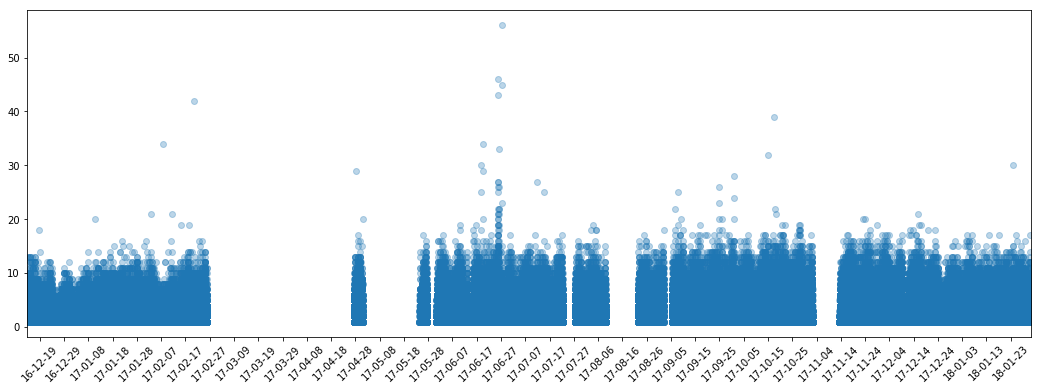

In [48]:
travel_count = c2g_data.init_time.value_counts(sort=False)

fig, ax = plt.subplots(1,1)
ax.scatter(travel_count.index, travel_count.values, alpha=0.3)

ax.set_xlim(travel_count.index.min(), travel_count.index.max())
plt.xticks(rotation=45)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))     #optional formatting 
plt.show()

Car2Go have some large intervals without data, but clear 4 intervals could be used.
* 2016-12-18 to 2017-02-27 = 68 days
* 2017-05-21 to 2017-08-11 = 82 days
* 2017-08-21 to 2017-11-04 = 75 days
* 2017-11-12 to 2018-02-02 = 76 days

https://stackoverflow.com/questions/52570199/multivariate-lstm-with-missing-values

Tenho que pegar intervalos de tempo semelhantes em inicio e fim para cada serviço? Ou a melhor 'temporada' do serviço?
Além disso, estou tentando pegar o máximo de dias possível, ou só uma semana é o suficiente? Ou até mesmo, porque não utilizar todos os dados?